# Ising 2D Solution by Wolff Algorithm

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline
import timeit

class IsingWolff:
    def __init__(self):
        """Initialization of de Lattice"""
        # set the number of spins in x-direrection, y-direction
        self.XSPINS = int(input('How many Xspins?'))
        self.YSPINS = int(input('How many Yspins?'))
        # set J_ij interaction constant magnitude
        self.J = 1.0
        # set initial lattice (-1 or 1)
        self.S = 2*np.random.randint(2,size =(self.XSPINS,self.YSPINS)) - 1
        # set the number of iteration 
        self.STEPS = 5000
        # set tuple (i, j) neighbor
        self.NEIGHBOR = {}
        for i in range(self.XSPINS):
            for j in range(self.YSPINS):
                self.NEIGHBOR[(i, j)] = [((i+1)%self.XSPINS, j), ((i-1)%self.XSPINS, j), (i, (j+1)%self.YSPINS), (i, (j-1)%self.YSPINS)]

   

    def Cluster_Flip(self,rede, p):
        """Function responsable for define and flip the Cluster one time"""
        # set random coordinate (i, j)
        coord = (np.random.randint(self.XSPINS), np.random.randint(self.YSPINS))
        # set pocket
        pocket = [coord]
        # set cluster
        cluster = [coord]
        # search pocket while pocket is not empty
        while pocket != []:
            # choose random tuple from pocket
            l = random.choice(pocket)
            # for loop for neightborhood
            for m in self.NEIGHBOR[l]:
                # if spins are parallel & (i, j) is not in cluster and r < p, add to pocket & cluster
                if rede[m[0]][m[1]] == rede[l[0]][l[1]]:
                    if m not in cluster:
                        if np.random.rand() < p:
                            pocket.append(m)
                            cluster.append(m)
            # remove choosen (i, j) from pocket list
            pocket.remove(l)
        # flip spin including cluster
        for l in cluster:
            rede[l[0]][l[1]] *= -1
        
        return rede
        
       

    def Plot_Spin(self, n):
        # remove previous figure
        plt.clf()
        # plot color map
        plt.imshow(self.S, cmap=plt.cm.PiYG, vmin=-1, vmax=1, animated=True)
        # add colorbar
        plt.colorbar(ticks=[-1, 1], orientation='vertical')
        # set pause interval time
        plt.pause(1.0e-6)
        # save figure as png format
        #plt.savefig('fig'+str(n)+'.png')

    def runGrid_Wolff(self):
        # set cluster flip probability
        rede =self.S
        p = 1.0 - np.exp(-2.0*self.J*1/1.9)
        
        # main loop start 
        for i in range(self.STEPS):
            # plot for especific iteration
            if i == 1:      self.Plot_Spin(i);
            if i == 100:       self.Plot_Spin(i);
            if i == 400:      self.Plot_Spin(i);
            if i == 1000:     self.Plot_Spin(i);
            if i == 4000:    self.Plot_Spin(i);
            
            # flip cluster
            self.Cluster_Flip(rede,p)
            
            
    def energy2(self,rede):
        
        '''Energia de uma dada configuração'''
        energy = 0
        for j in range(len(rede)): 
            for i in range(len(rede)):
                s = rede[i,j]
                nb = rede[(i+1)%self.XSPINS,j] + rede[i,(j+1)%self.YSPINS] + rede[(i-1)%self.XSPINS,j] + rede[i,(j-1)%self.YSPINS]
                energy += -nb*s
        return energy/4
    
    
    
 #DEFINIR MAGNETIZAÇÃO   
    def Mag2(self,rede):
        '''Magnetização de uma dada Rede'''
        mag = np.sum(rede)
        return mag
        
    def runObser_Wolff(self):
        toc = timeit.default_timer()
        nt = int(input('Choose How many temperature points in graphic'))
        T  = np.linspace(0.4, 3.28, nt);  #Temperatura
        E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)  #observaveis
        n1, n2  = 1.0/(self.STEPS*self.XSPINS*self.YSPINS), 1.0/(self.STEPS*self.STEPS*self.XSPINS*self.YSPINS) 
        for ii in range(nt):
            E1  = E2 =  0
            M1 = []
            M2 = []
            rede =self.S
            beta=1.0/T[ii]; beta2=beta*beta; p = 1.0 - np.exp(-2.0*self.J*beta);
            
            for i in range(self.STEPS):
                self.Cluster_Flip(rede,p)       #Monte Carlo Steps  
                Ene = self.energy2(rede)     # Calcula a energia
                mag = self.Mag2(rede)        # Calcula a magnetização
                
                E1 = E1 + Ene
                E2 = E2 + Ene*Ene
                M1.append(abs(mag))
                M2.append(mag*mag)        #Mag*Mag
                           
           
            E[ii] = n1*E1
            M[ii] = n1*np.sum(M1)
            C[ii] = (n1*E2 - n2*E1*E1)*beta2
            X[ii] = (n1*np.sum(M2) - n2*np.sum(M1)*np.sum(M1))*beta
            
        f2 = plt.figure(figsize=(18, 10)); # plot the calculated values    

        sp =  f2.add_subplot(2, 2, 1 );
        plt.scatter(T, E, s=50, marker='o', color='blue')
        plt.xlabel("Temperature ", fontsize=20);
        plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

        sp =  f2.add_subplot(2, 2, 2 );
        plt.scatter(T, abs(M), s=50, marker='o', color='lime')
        plt.xlabel("Temperature ", fontsize=20); 
        plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

        sp =  f2.add_subplot(2, 2, 3 );
        plt.scatter(T, C, s=50, marker='o', color='red')
        plt.xlabel("Temperature ", fontsize=20);  
        plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   

        sp =  f2.add_subplot(2, 2, 4 );
        plt.scatter(T, X, s=50, marker='o', color='magenta')
        plt.xlabel("Temperature ", fontsize=20); 
        plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');
        tic = timeit.default_timer()
        print("Running Time:",(tic-toc)//60,"minutes")




In [ ]:
#Call Wolff
IW = IsingWolff()
#run
IW.runObser_Wolff()

How many Xspins?30
How many Yspins?30


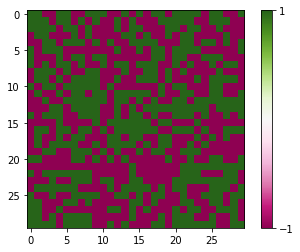

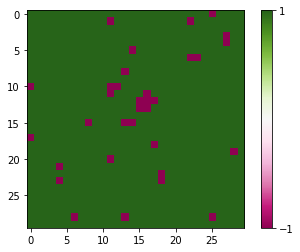

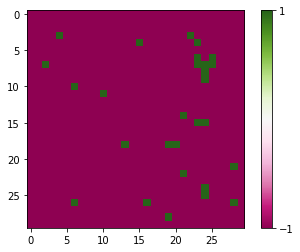

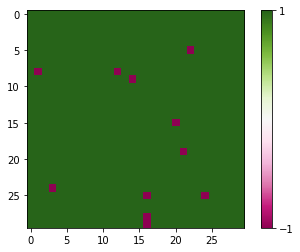

In [ ]:
#run snapshots for a given temperature
IW1 = IsingWolff()
IW1.runGrid_Wolff()